# Krishnas Final Project Jupyter Notebook

# Collecting the data for the variables I need 

In [176]:

#Getting gun/ shooting related crimes over time 2006-25 from NYC open data.
import requests 
import pandas as pd

from datetime import datetime 
response = requests.get('https://data.cityofnewyork.us/resource/833y-fsy8.json?$limit=1000000')
print(response)

json_data = response.json()
dfG = pd.DataFrame(json_data)
dfG

<Response [200]>


,incident_key,occur_date,occur_time,boro,loc_of_occur_desc,precinct,jurisdiction_code,loc_classfctn_desc,location_desc,statistical_murder_flag,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer
0,298699604,2024-12-31T00:00:00.000,19:16:00,BROOKLYN,OUTSIDE,69,0,STREET,(null),False,...,"1,015,120","173,870",40.643866,-73.888761,"{'type': 'Point', 'coordinates': [-73.888761, ...",2,8,42,13827,5
1,298699604,2024-12-31T00:00:00.000,19:16:00,BROOKLYN,OUTSIDE,69,0,STREET,(null),False,...,"1,015,120","173,870",40.643866,-73.888761,"{'type': 'Point', 'coordinates': [-73.888761, ...",2,8,42,13827,5
2,298672096,2024-12-30T00:00:00.000,16:45:00,BRONX,OUTSIDE,47,0,STREET,(null),False,...,"1,021,316","259,277",40.878261,-73.865964,"{'type': 'Point', 'coordinates': [-73.865964, ...",5,2,30,11605,29
3,298672094,2024-12-30T00:00:00.000,12:15:00,BRONX,OUTSIDE,52,0,STREET,(null),False,...,"1,017,719","260,875",40.882661,-73.878964,"{'type': 'Point', 'coordinates': [-73.878964, ...",5,40,34,11605,24
4,298672095,2024-12-30T00:00:00.000,20:32:00,BRONX,INSIDE,41,0,DWELLING,MULTI DWELL - APT BUILD,True,...,"1,012,201","240,878",40.827795,-73.899003,"{'type': 'Point', 'coordinates': [-73.899003, ...",5,43,25,10937,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29739,9953250,2006-01-01T00:00:00.000,02:34:00,QUEENS,NaN,114,0,NaN,BAR/NIGHT CLUB,True,...,1002576.750000000000000,221583.453125000000000,40.774860941000043,-73.933832584999948,"{'type': 'Point', 'coordinates': [-73.93383258...",3,4,72,16859,39
29740,9953245,2006-01-01T00:00:00.000,02:00:00,BRONX,NaN,48,0,NaN,NONE,False,...,1013404.562500000000000,251800.750000000000000,40.857769822000080,-73.894607459999975,"{'type': 'Point', 'coordinates': [-73.89460745...",5,22,29,10936,6
29741,139716503,2006-01-01T00:00:00.000,12:30:00,BROOKLYN,NaN,77,0,NaN,PVT HOUSE,True,...,996441.562500000000000,184160.359375000000000,40.672154209000041,-73.956051504999948,"{'type': 'Point', 'coordinates': [-73.95605150...",2,48,49,17618,16
29742,9953246,2006-01-01T00:00:00.000,05:51:00,BRONX,NaN,44,0,NaN,NONE,False,...,1007418.000000000000000,243859.218750000000000,40.835990401000061,-73.916276358999937,"{'type': 'Point', 'coordinates': [-73.91627635...",5,42,27,10934,50


In [47]:

#Using datetime I import to make a new data frame of the occur date column. Assigning start date and end dates

dfG['occur_date'] = pd.to_datetime(dfG['occur_date'])
start_date = datetime(2008, 1, 1)
end_date = datetime(2018, 12, 31)

#This Looking for the first instance of a shooting withing the time frame and the end date 

before_df = dfG[(dfG['occur_date'] >= start_date) & (dfG['occur_date'] <= end_date)]
sorted_df = before_df.sort_values('occur_date')

#  Creating a new Data frame with the colomns I need
restricted_column_df1 = sorted_df[['occur_date', 'boro']]

print(restricted_column_df1)

      occur_date       boro
25801 2008-01-01     QUEENS
25783 2008-01-01      BRONX
25784 2008-01-01      BRONX
25785 2008-01-01  MANHATTAN
25786 2008-01-01   BROOKLYN
...          ...        ...
9078  2018-12-30   BROOKLYN
9077  2018-12-30     QUEENS
9076  2018-12-30   BROOKLYN
9075  2018-12-31  MANHATTAN
9074  2018-12-31      BRONX

[16728 rows x 2 columns]


In [222]:
# Group by 'occur_date' and 'boro' and count incidents
gun_counts = dfG.groupby(['occur_date', 'boro']).size().reset_index(name='gun_incidents')

# Print to verify the output
print(gun_counts.head())


                occur_date       boro  gun_incidents
0  2006-01-01T00:00:00.000      BRONX              2
1  2006-01-01T00:00:00.000   BROOKLYN              2
2  2006-01-01T00:00:00.000  MANHATTAN              1
3  2006-01-01T00:00:00.000     QUEENS              3
4  2006-01-02T00:00:00.000   BROOKLYN              3


In [226]:
# Convert 'date' in combined_df to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Convert 'occur_date' in gun_counts to datetime if it's not already
gun_counts['occur_date'] = pd.to_datetime(gun_counts['occur_date'])

# Now merge the DataFrames
combined_df = pd.merge(combined_df, gun_counts, left_on=['date', 'borough'], right_on=['occur_date', 'boro'], how='left')

# Print the merged DataFrame to verify
print(combined_df.head())


        date borough total_grads_of_cohort dropped_out_of_cohort  \
0 2008-01-01   Bronx                 0.507                 0.157   
1 2008-01-01   Bronx                 0.554                 0.157   
2 2008-01-01   Bronx                 0.609                  0.21   
3 2008-01-01   Bronx                 0.622                  0.21   
4 2008-01-01   Bronx                 0.646                 0.225   

   Household Type DataFormat Median_Income     Fips  gun_incidents_x  \
0  All Households    Dollars   47843.15993  36005.0              7.0   
1  All Households    Dollars   47843.15993  36005.0              7.0   
2  All Households    Dollars   47843.15993  36005.0              7.0   
3  All Households    Dollars   47843.15993  36005.0              7.0   
4  All Households    Dollars   47843.15993  36005.0              7.0   

  occur_date boro  gun_incidents_y  
0        NaT  NaN              NaN  
1        NaT  NaN              NaN  
2        NaT  NaN              NaN  
3        N

In [102]:

#I want average age per borough (men/ boys between 15-24 are more likely to commit gun related)

#average income level for each borough to control for income level

#education level in area (borough) - used graautaion rate for public schools in different boroughs 

#Police presence in the area - could not find reliable data for this, or CSV was too bg and gave issues. 




In [153]:
#BETTER MEDIAN INC data 
from datetime import datetime
import pandas as pd

f_path = 'C:/Users/Owner/OneDrive/Desktop/Pace Spring 25/Data Analytics/Median incomes.csv'
m_income = pd.read_csv(f_path, skiprows=5)

m_income['TimeFrame'] = pd.to_numeric(m_income['TimeFrame'], errors='coerce')

# Define boroughs
boroughs = ['Brooklyn', 'Queens', 'Manhattan', 'Staten Island', 'Bronx']

# Filter dataset
film_income = m_income[
    (m_income['Location'].isin(boroughs)) &
    (m_income['Household Type'] == 'All Households') &
    (m_income['TimeFrame'].between(2008, 2018))
]

#  result
print(film_income)

#Originally had a differnet data set but found a better CSV and had to delte the old and add into the final data set. 

           Location  Household Type  TimeFrame DataFormat          Data   Fips
1111      Manhattan  All Households       2018    Dollars  100098.60316  36061
1116  Staten Island  All Households       2018    Dollars   96686.12403  36085
1171         Queens  All Households       2018    Dollars   81570.01824  36081
1202       Brooklyn  All Households       2018    Dollars   72038.61103  36047
1272          Bronx  All Households       2018    Dollars   45264.77051  36005
1359      Manhattan  All Households       2017    Dollars  102013.59995  36061
1376  Staten Island  All Households       2017    Dollars   94974.54043  36085
1424         Queens  All Households       2017    Dollars   77356.50597  36081
1461       Brooklyn  All Households       2017    Dollars   68282.47473  36047
1529          Bronx  All Households       2017    Dollars    44844.9248  36005
1633      Manhattan  All Households       2016    Dollars   94825.97491  36061
1634  Staten Island  All Households       2016    Do

In [155]:
# Rename 'TimeFrame' to 'date' to align with combined_df
film_income = film_income.rename(columns={'TimeFrame': 'date'})

# Convert 'date' to datetime format for consistency
film_income['date'] = pd.to_datetime(film_income['date'], format='%Y')

# Merge into combined_df
combined_df = pd.merge(combined_df, film_income, on='date', how='outer')

# Optional: sort by date
combined_df = combined_df.sort_values('date')

# Display final combined data
print(combined_df)


            date        borough  total_grads_of_cohort  dropped_out_of_cohort  \
0     2008-01-01  Staten Island                  0.720                  0.084   
7895  2008-01-01      Manhattan                  0.721                  0.151   
7896  2008-01-01      Manhattan                  0.721                  0.151   
7897  2008-01-01      Manhattan                  0.721                  0.151   
7898  2008-01-01      Manhattan                  0.721                  0.151   
...          ...            ...                    ...                    ...   
41247 2018-12-30       Brooklyn                  0.708                  0.083   
41246 2018-12-30       Brooklyn                  0.708                  0.083   
41248 2018-12-30       Brooklyn                  0.708                  0.083   
41249 2018-12-31       Brooklyn                  0.708                  0.083   
41250 2018-12-31       Brooklyn                  0.708                  0.083   

          Location_x Househ

In [67]:
#Education information 

import requests 
import pandas as pd

response = requests.get('https://data.cityofnewyork.us/resource/k2ic-km9j.json?$limit=1000000')
print(response)

json_data = response.json()
dfE = pd.DataFrame(json_data)



<Response [200]>


In [69]:
dfE

,borough,cohort_year,cohort_category,total_cohort,total_grads,total_grads_of_cohort,total_regents,total_regents_of_cohort,total_regents_of_grads,advanced_regents,...,regents_w_o_advanced,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local,local_of_cohort,local_of_grads,still_enrolled,still_enrolled_of_cohort,dropped_out,dropped_out_of_cohort
0,Bronx,2001,4 Year June,11453,4913,0.429,2644,0.231,0.538,998,...,1646,0.144,0.335,2271,0.198,0.462,3512,0.307,2438,0.213
1,Bronx,2001,5 Year June,11453,6058,0.529,2859,0.25,0.472,1022,...,1837,0.16,0.303,3209,0.28,0.53,1412,0.123,3178,0.277
2,Bronx,2001,6 Year,11453,6360,0.555,2895,0.253,0.455,1022,...,1873,0.164,0.294,3501,0.306,0.55,610,0.053,3614,0.316
3,Bronx,2002,4 Year June,12032,5328,0.443,3118,0.259,0.585,992,...,2126,0.177,0.399,2217,0.184,0.416,4047,0.336,2140,0.178
4,Bronx,2002,5 Year June,12032,6582,0.547,3401,0.283,0.517,1013,...,2388,0.198,0.363,3232,0.269,0.491,1724,0.143,3008,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Staten Island,2010,4 Year August,4567,3612,0.791,3264,0.715,0.904,1057,...,2207,0.483,0.611,348,0.076,0.096,523,0.115,366,0.08
206,Staten Island,2010,5 Year June,4548,3737,0.822,3332,0.733,0.892,1057,...,2275,0.5,0.609,405,0.089,0.108,219,0.048,472,0.104
207,Staten Island,2010,5 Year August,4548,3755,0.826,3341,0.735,0.89,1057,...,2284,0.502,0.608,414,0.091,0.11,201,0.044,472,0.104
208,Staten Island,2011,4 Year June,4481,3392,0.757,3095,0.691,0.912,1083,...,2012,0.449,0.593,297,0.066,0.088,646,0.144,338,0.075


In [71]:
dfE['cohort_year'] = pd.to_datetime(dfE['cohort_year'])
start_date2 = datetime(2008, 1, 1)
end_date2 = datetime(2015, 12, 31)

before_df2 = dfE[(dfE['cohort_year'] >= start_date) & (dfE['cohort_year'] <= end_date)]
sorted_df2 = before_df2.sort_values('cohort_year')

#  Creating a new DF with the colomns i need
restricted_column_df2 = sorted_df2[['cohort_year', 'borough', 'total_grads_of_cohort', 'dropped_out_of_cohort']]

print(restricted_column_df2)

    cohort_year        borough total_grads_of_cohort dropped_out_of_cohort
26   2008-01-01          Bronx                 0.507                 0.157
113  2008-01-01      Manhattan                 0.721                 0.151
112  2008-01-01      Manhattan                 0.712                 0.152
111  2008-01-01      Manhattan                 0.666                  0.11
110  2008-01-01      Manhattan                 0.628                  0.11
..          ...            ...                   ...                   ...
124  2011-01-01      Manhattan                 0.692                 0.077
82   2011-01-01       Brooklyn                  0.67                 0.083
83   2011-01-01       Brooklyn                 0.708                 0.083
40   2011-01-01          Bronx                 0.583                 0.131
209  2011-01-01  Staten Island                 0.774                 0.075

[80 rows x 4 columns]


# Overview of working with an API 

 An API works by sending a request to a website storing the data. By using the requests library in Python, we can retrieve data from this endpoint in JSON format. 
 The data can then be loaded into a Pandas DataFrame for further analysis. I used NYC open data portal to access most my information for this porject. 

In [160]:
#Example
import requests 
import pandas as pd
from datetime import datetime 

response = requests.get('https://data.cityofnewyork.us/resource/833y-fsy8.json?$limit=1000000')

print(response)

json_data = response.json()


<Response [200]>


# Combining process of Different data sets to one 

In [73]:
restricted_column_df2 = restricted_column_df2.rename(columns = {'cohort_year' : 'date'})

restricted_column_df1 = restricted_column_df1.rename(columns = {'occur_date' : 'date'})

combined_df = pd.concat([restricted_column_df2, restricted_column_df1], ignore_index = True)

combined_df

,date,borough,total_grads_of_cohort,dropped_out_of_cohort,boro
0,2008-01-01,Bronx,0.507,0.157,NaN
1,2008-01-01,Manhattan,0.721,0.151,NaN
2,2008-01-01,Manhattan,0.712,0.152,NaN
3,2008-01-01,Manhattan,0.666,0.11,NaN
4,2008-01-01,Manhattan,0.628,0.11,NaN
...,...,...,...,...,...
16803,2018-12-30,NaN,NaN,NaN,BROOKLYN
16804,2018-12-30,NaN,NaN,NaN,QUEENS
16805,2018-12-30,NaN,NaN,NaN,BROOKLYN
16806,2018-12-31,NaN,NaN,NaN,MANHATTAN


In [77]:


combined_df = pd.concat([restricted_column_df2, restricted_column_df1], axis = 1)

combined_df

,date,borough,total_grads_of_cohort,dropped_out_of_cohort,date,boro
26,2008-01-01,Bronx,0.507,0.157,NaT,NaN
113,2008-01-01,Manhattan,0.721,0.151,NaT,NaN
112,2008-01-01,Manhattan,0.712,0.152,NaT,NaN
111,2008-01-01,Manhattan,0.666,0.11,NaT,NaN
110,2008-01-01,Manhattan,0.628,0.11,NaT,NaN
...,...,...,...,...,...,...
9078,NaT,NaN,NaN,NaN,2018-12-30,BROOKLYN
9077,NaT,NaN,NaN,NaN,2018-12-30,QUEENS
9076,NaT,NaN,NaN,NaN,2018-12-30,BROOKLYN
9075,NaT,NaN,NaN,NaN,2018-12-31,MANHATTAN


In [79]:
restricted_column_df2 = restricted_column_df2.rename(columns = {'cohort_year' : 'date'})

restricted_column_df1 = restricted_column_df1.rename(columns = {'occur_date' : 'date'})

In [276]:
# Merge df1 and df2 on 'date'
merged_df = pd.merge(restricted_column_df1, restricted_column_df2, on='date', how='outer')

# Merge the result with df3
combined_df = pd.merge(merged_df, film_income, on='date', how='outer')

# Sort by date if needed
combined_df = combined_df.sort_values('date')

print(combined_df)

            date      borough_x      borough_y total_grads_of_cohort  \
0     2008-01-01         Queens          Bronx                 0.507   
1581  2008-01-01  Staten Island  Staten Island                  0.72   
1582  2008-01-01  Staten Island  Staten Island                  0.72   
1583  2008-01-01  Staten Island  Staten Island                  0.72   
1584  2008-01-01  Staten Island  Staten Island                  0.72   
...          ...            ...            ...                   ...   
21552 2018-12-30         Queens            NaN                   NaN   
21551 2018-12-30       Brooklyn            NaN                   NaN   
21553 2018-12-30       Brooklyn            NaN                   NaN   
21554 2018-12-31      Manhattan            NaN                   NaN   
21555 2018-12-31          Bronx            NaN                   NaN   

      dropped_out_of_cohort        borough  Household Type DataFormat  \
0                     0.157  Staten Island  All Households    

# Checking and cleaning final data set before running Regressions

In [92]:
film_income['Location'] = film_income['Location'].replace({
    'Kings': 'Brooklyn',
    'New York': 'Manhattan',
    'Richmond': 'Staten Island',
    'Bronx': 'Bronx',
    'Queens': 'Queens'
})

In [96]:
combined_df = combined_df.ffill().bfill()

In [98]:
print(combined_df.columns)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

Index(['date', 'boro', 'borough', 'total_grads_of_cohort',
       'dropped_out_of_cohort', 'Location', 'Household Type', 'DataFormat',
       'Data', 'Fips'],
      dtype='object')


In [178]:
# Normalize borough columns
restricted_column_df1['boro'] = restricted_column_df1['boro'].str.title()
restricted_column_df2['borough'] = restricted_column_df2['borough'].str.title()
film_income['Location'] = film_income['Location'].str.title()



In [180]:
restricted_column_df1 = restricted_column_df1.rename(columns={'boro': 'borough'})
film_income = film_income.rename(columns={'Location': 'borough'})


In [182]:
merged_df = pd.merge(restricted_column_df1, restricted_column_df2, on=['date', 'borough'], how='outer')
combined_df = pd.merge(merged_df, film_income, on=['date', 'borough'], how='outer')


In [184]:
combined_df = combined_df.sort_values(by=['date', 'borough']).reset_index(drop=True)


In [210]:
gun_counts = restricted_column_df1.groupby(['date', 'borough']).size().reset_index(name='gun_incidents')
# Merge gun incident counts into the combined dataset
combined_df = pd.merge(combined_df, gun_counts, on=['date', 'borough'], how='left')

# Fill missing gun incident values with 0 (in case no incidents reported for that date/borough)
combined_df['gun_incidents'] = combined_df['gun_incidents'].fillna(0)


In [212]:
combined_df = combined_df.rename(columns={'Data': 'Median_Income'})


In [214]:
combined_df = combined_df.drop(columns=['boro'], errors='ignore')



In [215]:
combined_df.to_csv('combined_data.csv', index=False) 

combined_df.to_csv('C:/Users/Owner/Documents/combined_data.csv', index=False) #saving data frame for future work


In [216]:
print(combined_df.columns)


Index(['date', 'borough', 'total_grads_of_cohort', 'dropped_out_of_cohort',
       'Household Type', 'DataFormat', 'Median_Income', 'Fips',
       'gun_incidents'],
      dtype='object')


# Hurdles in Data cleaning 


Some hurdles I delt with while going throgh the data was having variables in data sets I didnt need, for example in the Gun related incidents CSV, there were coordinates for exaclty where crimes took place which is too much information for the study i am trying to do. I would have to drop these variables to make it easier to look at later. I also had issues of missing values in some data sets so had to go in and change them or find a differnet CSV with not missing values. Another issue faced was different data sets had different names for the same variables. Like "Data" was my variable for median income and needed to rename it. One data set I used named each borough as 'Bronx, NY' which gave the system issues when trying to read that because of the comma I am assuming. 

# Regression & Analysis

In [252]:
# Check for missing values
print(combined_df.isnull().sum())
print(combined_df.columns)


date                         0
borough                      0
total_grads_of_cohort        0
dropped_out_of_cohort        0
Household Type               0
DataFormat                   0
Median_Income                0
Fips                         0
gun_incidents_x              0
occur_date               16896
boro                     16896
gun_incidents_y              0
dtype: int64
Index(['date', 'borough', 'total_grads_of_cohort', 'dropped_out_of_cohort',
       'Household Type', 'DataFormat', 'Median_Income', 'Fips',
       'gun_incidents_x', 'occur_date', 'boro', 'gun_incidents_y'],
      dtype='object')


In [262]:
combined_df

,date,borough,total_grads_of_cohort,dropped_out_of_cohort,Household Type,DataFormat,Median_Income,Fips,gun_incidents_x,occur_date,boro,gun_incidents_y
0,2008-01-01,Bronx,0.507,0.157,All Households,Dollars,47843.15993,36005.0,7.0,NaT,NaN,0.0
1,2008-01-01,Bronx,0.554,0.157,All Households,Dollars,47843.15993,36005.0,7.0,NaT,NaN,0.0
2,2008-01-01,Bronx,0.609,0.21,All Households,Dollars,47843.15993,36005.0,7.0,NaT,NaN,0.0
3,2008-01-01,Bronx,0.622,0.21,All Households,Dollars,47843.15993,36005.0,7.0,NaT,NaN,0.0
4,2008-01-01,Bronx,0.646,0.225,All Households,Dollars,47843.15993,36005.0,7.0,NaT,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16891,2018-12-30,Brooklyn,0.712,0.157,All Households,Dollars,47843.15993,36047.0,2.0,NaT,NaN,0.0
16892,2018-12-30,Brooklyn,0.712,0.157,All Households,Dollars,47843.15993,36047.0,2.0,NaT,NaN,0.0
16893,2018-12-30,Queens,0.712,0.157,All Households,Dollars,47843.15993,36047.0,1.0,NaT,NaN,0.0
16894,2018-12-31,Bronx,0.712,0.157,All Households,Dollars,47843.15993,36047.0,1.0,NaT,NaN,0.0


In [296]:
import pandas as pd

# Assuming your dataframe is named 'df'
# Drop unnecessary columns
df_clean = combined_df.drop(columns=['occur_date', 'DataFormat', 'Household Type', 'boro', 'Fips'])

# Check for missing values
print(df_clean.isnull().sum())

# Handle missing values (example approaches)
df_clean = df_clean.dropna(subset=['gun_incidents_x', 'gun_incidents_y'])  # Or impute if appropriate

# Convert date to datetime and extract time features
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month

KeyError: "['occur_date', 'boro'] not found in axis"

In [298]:
df_clean

,date,borough,total_grads_of_cohort,dropped_out_of_cohort,median_income,fips,gun_incidents_x,boro,gun_incidents_y,year,month
0,2008-01-01,Bronx,0.507,0.157,47843.15993,36005.0,7.0,NaN,0.0,2008,1
1,2008-01-01,Bronx,0.554,0.157,47843.15993,36005.0,7.0,NaN,0.0,2008,1
2,2008-01-01,Bronx,0.609,0.21,47843.15993,36005.0,7.0,NaN,0.0,2008,1
3,2008-01-01,Bronx,0.622,0.21,47843.15993,36005.0,7.0,NaN,0.0,2008,1
4,2008-01-01,Bronx,0.646,0.225,47843.15993,36005.0,7.0,NaN,0.0,2008,1
...,...,...,...,...,...,...,...,...,...,...,...
16891,2018-12-30,Brooklyn,0.712,0.157,47843.15993,36047.0,2.0,NaN,0.0,2018,12
16892,2018-12-30,Brooklyn,0.712,0.157,47843.15993,36047.0,2.0,NaN,0.0,2018,12
16893,2018-12-30,Queens,0.712,0.157,47843.15993,36047.0,1.0,NaN,0.0,2018,12
16894,2018-12-31,Bronx,0.712,0.157,47843.15993,36047.0,1.0,NaN,0.0,2018,12


In [286]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, poisson

# Clean column names (remove spaces and standardize)
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')

# Check dependent variable distribution
print(df_clean['gun_incidents_x'].value_counts())
print(df_clean['gun_incidents_x'].describe())

# Handle missing values if any
df_clean = df_clean.dropna(subset=['gun_incidents_x'])

# Convert categorical variables, makes them into numeric categories so computer can understand 
df_clean['borough'] = pd.Categorical(df_clean['borough'])
df_clean['year'] = pd.Categorical(df_clean['year'])
df_clean['month'] = pd.Categorical(df_clean['month'])

gun_incidents_x
1.0     4287
2.0     3834
3.0     2640
4.0     1980
5.0     1285
6.0     1032
7.0      539
8.0      432
9.0      288
10.0     180
13.0      91
12.0      84
11.0      55
15.0      45
14.0      42
19.0      38
0.0       28
16.0      16
Name: count, dtype: int64
count    16896.000000
mean         3.377723
std          2.634501
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         19.000000
Name: gun_incidents_x, dtype: float64


In [310]:
# Linear regression model
linear_model = ols(
    'gun_incidents_x ~ borough + total_grads_of_cohort + dropped_out_of_cohort + median_income + year + month',
    data=df_clean).fit()

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:        gun_incidents_x   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     19.78
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        22:23:31   Log-Likelihood:                -39347.
No. Observations:               16896   AIC:                         7.891e+04
Df Residuals:                   16789   BIC:                         7.973e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [334]:
# Remove perfect collinearity sources
df_clean = df_clean.drop(columns=['median_income'])  # Constant values in sample

# Use continuous treatment for rates
df_clean['total_grads_of_cohort'] = pd.to_numeric(df_clean['total_grads_of_cohort'])
df_clean['dropped_out_of_cohort'] = pd.to_numeric(df_clean['dropped_out_of_cohort'])

# Try simplified model
simplified_model = ols('gun_incidents_x ~ borough + total_grads_of_cohort + dropped_out_of_cohort + C(year) + C(month)',
    data = df_clean).fit()


KeyError: "['median_income'] not found in axis"

In [336]:
df_clean = df_clean.drop(columns=['Median_Income', 'median_income'], errors='ignore')

In [338]:
simplified_model = ols('gun_incidents_x ~ borough + total_grads_of_cohort + dropped_out_of_cohort + C(year) + C(month)',
    data = df_clean).fit()


In [342]:
print(simplified_model.summary())

                            OLS Regression Results                            
Dep. Variable:        gun_incidents_x   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        22:31:14   Log-Likelihood:                -39395.
No. Observations:               16896   AIC:                         7.885e+04
Df Residuals:                   16868   BIC:                         7.906e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Regression Interpretation

When it comes to my actual regression: My R-sqaured was 11.1% meaning my model only explained about 11.1% f varianve in gun incidents. This suggest very limited explanitory value. I chanhed my model dropping median income as it was not changing over time causing collinearity. In my new model, I still have low explanatory power with an R squared of 10.6%. From the regression i can see that Staten Island has the fewwst basline gun incidents (-1.60) amongts all other boroughs. There was the strongest decrease in gun incidents between 2013 and 2018 suggesting that my Hypothesis is correct that the 2013 Safe Act contributed to the reduction in gun crimes in NYC. 
Higher graduation rates were associated with fewwer gun incidents, for every one unit increae in graduation rate, we saw a -10.48 increase in gun incidents. 
Some ssues still are the Durbin watson stat is 0.395 showing positive auto correlation. This violates the assumption of independance in the model. 

# Graphs and Analysis

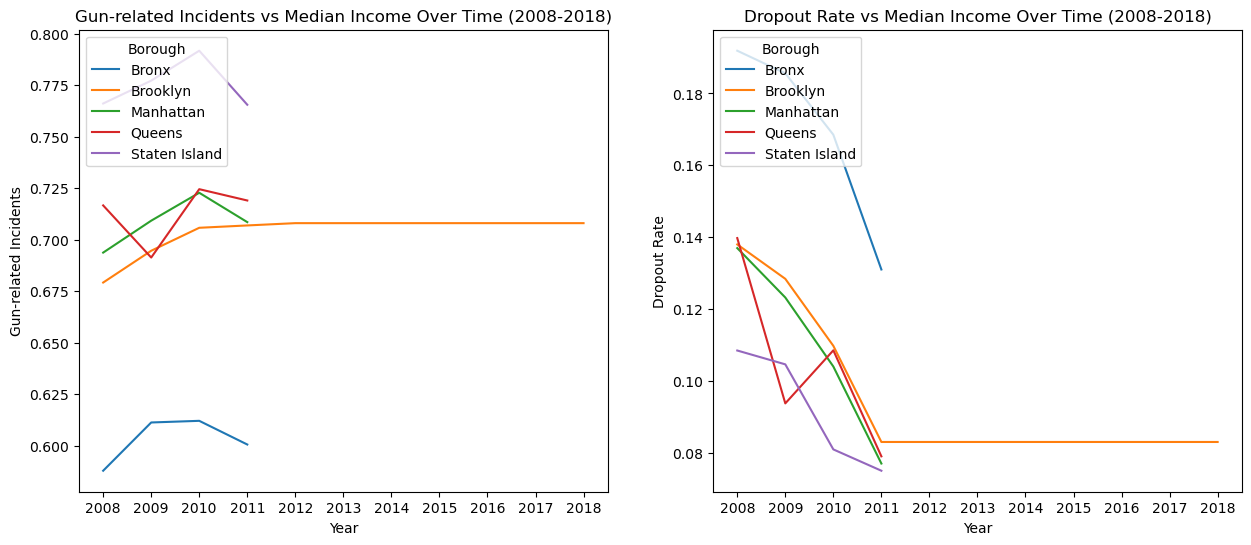

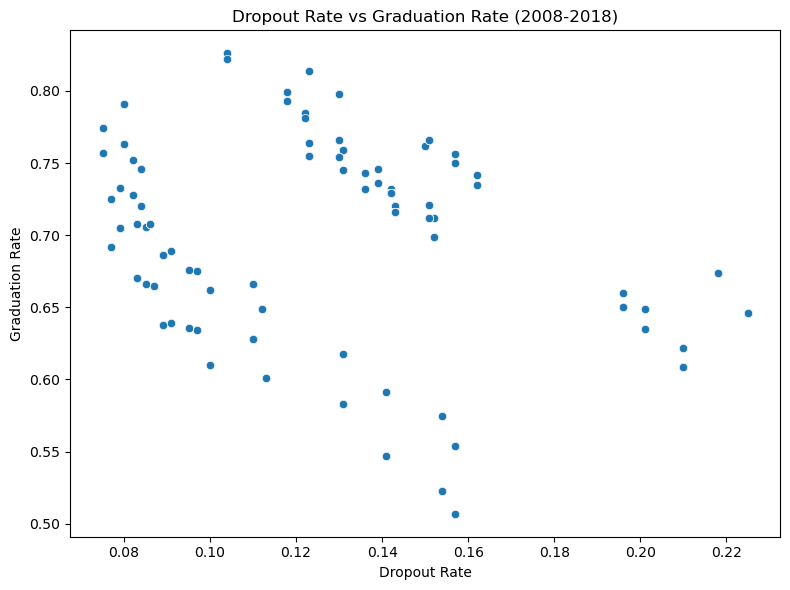

In [138]:
#grpahs for the combined data frame 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Filtering the data to include only 2008-2018
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df = combined_df[(combined_df['date'].dt.year >= 2008) & (combined_df['date'].dt.year <= 2018)]

# Extract year for easier comparison
combined_df['year'] = combined_df['date'].dt.year

# Grouping by year and borough to compute average gun-related incidents and median income
avg_data = combined_df.groupby(['year', 'borough']).agg({
    'total_grads_of_cohort': 'mean',
    'dropped_out_of_cohort': 'mean',
    'Median_Income': 'mean'
}).reset_index()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graph 1: Gun-related Incidents vs Median Income
sns.lineplot(data=avg_data, x='year', y='total_grads_of_cohort', hue='borough', ax=axes[0])
axes[0].set_title('Gun-related Incidents vs Median Income Over Time (2008-2018)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Gun-related Incidents')
axes[0].set_xticks(range(2008, 2019))  # isolating for years 2008-2018
axes[0].legend(title='Borough', loc='upper left')

# Graph 2: Dropout Rate vs Median Income (2008-2018)
sns.lineplot(data=avg_data, x='year', y='dropped_out_of_cohort', hue='borough', ax=axes[1])
axes[1].set_title('Dropout Rate vs Median Income Over Time (2008-2018)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Dropout Rate')
axes[1].set_xticks(range(2008, 2019))  
axes[1].legend(title='Borough', loc='upper left')

# Third Graph: Scatter plot of Dropout Rate vs Graduation Rate (unchanged)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='dropped_out_of_cohort', y='total_grads_of_cohort')
plt.title('Dropout Rate vs Graduation Rate (2008-2018)')
plt.xlabel('Dropout Rate')
plt.ylabel('Graduation Rate')

# Show all the plots
plt.tight_layout()
plt.show()

Graph 1: This graph shows Gun related incidents vs median income, from the time of my study 2008-2018. From the graph i can see there is some missing data points. From what i can see, 
areas with higher gun crime like the Bronx had higher gun icidnets than welathier areas like Manhatan. 

Graph 2: shows an inverse relationship between the dropout rate and median income in NYC boroughs. Higher income areas like manhattan and staten island show lower dropout rates and lower income areas like
the Bronx had higher rates oh highschool dropouts. 

Graph 3 shows the drop out rate vs Graduation rate, this shows an inverse relationship between dropout rates and graduation rates, where higher graduation rates correspond to lower dropout rates.
